# Study of $\Delta$ effects

The $\mu^-$ only fit was parametrized using $p_1$ as the probability of observing a $\mu^+$  decay, $p_2$ the probability of $\mu^-$ decay and $p_3$ the background.

By definition
$$
p_2 = (p_1 + \Delta) \; \text{BR}^-(\beta) \; w
$$
where
$$
\text{BR}^-(\beta) = \tau_-/\tau_+
$$
$$
w = \frac{e^{-t_\text{start}/\tau_-} - e^{-t_\text{stop}/\tau_-}}{e^{-t_\text{start}/\tau_+} - e^{-t_\text{stop}/\tau_+}}
$$

From a physics point of view we can estimate the efficiency of the setup for capture events using the following interpretation:
$$
p_2 = \beta\text{ decay} + \text{capture} = p_1\; w \; \text{BR}^-(\beta) + p_1\; w \;(1-\text{BR}^-(\beta))\frac{\varepsilon_\text{capture}}{\varepsilon_\beta}
$$
We have to keep in mind the efficiency is relative to the beta decay one, that can be assumed similar for $\mu^\pm$, so it would normally factor out.

By comparing it with the above formula we find:
$$
\Delta \; \text{BR}^-(\beta) = p_1\; (1-\text{BR}^-(\beta))\frac{\varepsilon_\text{capture}}{\varepsilon_\beta}
$$

So:
$$
\frac{\varepsilon_\text{capture}}{\varepsilon_\beta} = \frac{\Delta}{p_1} \; \frac{\text{BR}^-(\beta)}{1-\text{BR}^-(\beta)} = \frac{\Delta}{p_1} \; \frac{\tau_-}{\tau_+ - \tau_-}
$$

In [1]:
library(R2jags)
library(ggplot2)
source("utils.R")
load("negativeMuonCorrettoda02a9Thinning100Burnin1000")

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot




In [2]:
mt <- as.matrix(as.mcmc(chain))
mt <- tidyup.col.name(mt)

In [3]:
eff.values <- mt[,"delta"]/mt[,"p1"] * mt[,"taum"]/(mt[,"taup"] - mt[,"taum"])

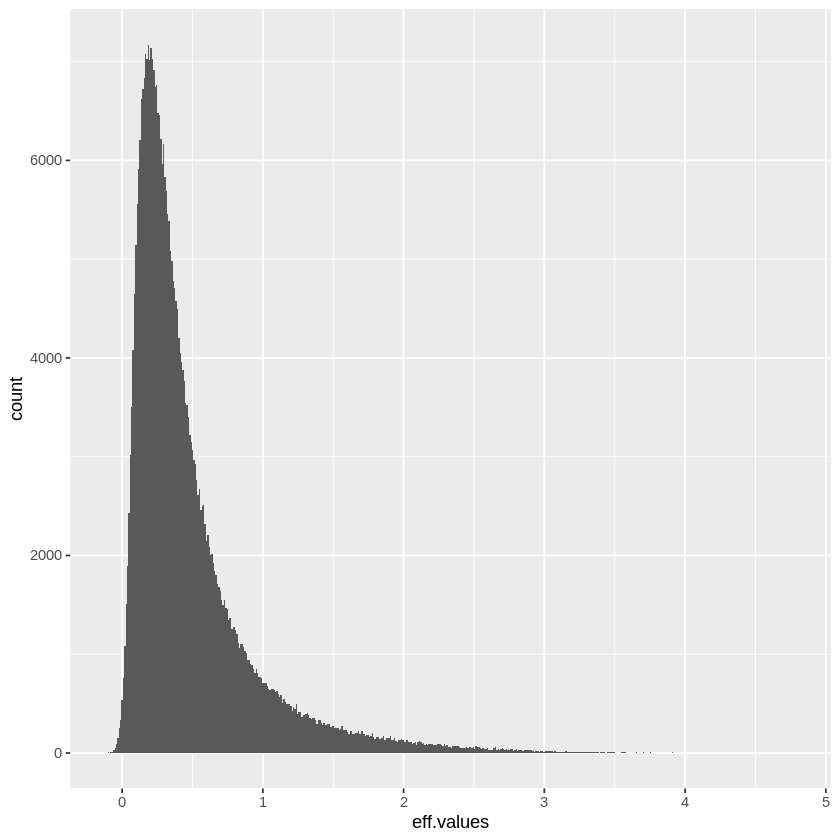

In [4]:
ggplot() + geom_histogram(aes(x = eff.values), bins=500)

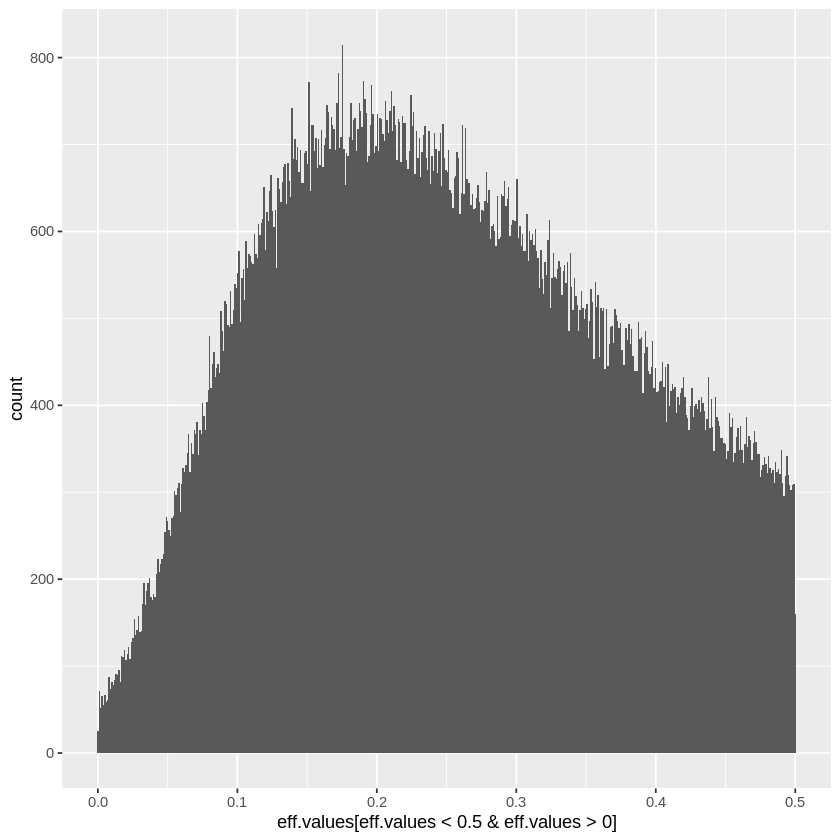

In [5]:
ggplot() + geom_histogram(aes(x = eff.values[eff.values<0.5 & eff.values>0]), bins=500)

The above distribution is very strange. I will compute a series of estimators in order to get a physical insight.

In [6]:
eff.mean <- mean(eff.values)
eff.meadian <- median(eff.values)

eff.hist <- hist(eff.values, breaks=500, plot=F)
eff.mode <- eff.hist$mids[which.max(eff.hist$counts)]

eff.sorted.values <- sort(eff.values)
eff.low  <- eff.sorted.values[0.025*length(eff.values)]
eff.high <- eff.sorted.values[0.975*length(eff.values)]
eff.std  <- sqrt(var(eff.values))

In [7]:
eff.mean
eff.meadian
eff.mode
eff.low
eff.high
eff.std

[1] 0.4835802

[1] 0.3407029

[1] 0.185

[1] 0.05433507

[1] 1.817969

[1] 0.4542026

Interestingly at $2\;\text{MeV}$ the mass attenuation coefficient in aluminium is $\mu=4.3\times10^{-2}\;\text{cm}^2/\text{g}$, given the $\rho=2.7\;\text{g}/\text{cm}^3$ of aluminium and assuming a thickness of $x=2\;\text{cm}$ we get that the probability of producing an electron due to Compton or photoelectric effect is

In [8]:
mu <- 4.3e-2
rho <- 2.7
x <- 2

p <- 1 - exp(-mu*rho*x)
p

[1] 0.2072125

Suprisingly close to the order of magnitude we expect for this effect. We might thus conclude that this excess of events might be due to the $\gamma$s produced by the muon capture and their following interaction with the aluminium to produce electrons that will then be detected by the scintillators.